In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sbn
sbn.set()

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
import datetime

fileRoots = ['shtmax', 'shtmin', 'shtpre', 'shtsno_b']
months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

dataFrames = []

for root in fileRoots:
    for month in months:
        filePath = 'combined/' + root + month + '.txt'
        df = pd.read_table(filePath, sep='\s+', header = None, index_col = 0)
        dataFrames.append(df)

maxTempsDfs = dataFrames[0:12]
minTempsDfs = dataFrames[12:24]
precipDfs = dataFrames[24:36]
snowDfs = dataFrames[36:48]

for i in range(12):
    currentDataFrame = maxTempsDfs[i].replace(-99, pd.np.nan).replace(-9900, pd.np.nan)
    currentDataFrame = currentDataFrame.stack().dropna()
    currentDataFrame.index = pd.Index([datetime.date(year_day[0], (i + 1), year_day[1]) for year_day in currentDataFrame.index]).to_datetime()
    maxTempsDfs[i] = currentDataFrame.to_frame(name="maxTemp")
    
for i in range(12):
    currentDataFrame = minTempsDfs[i].replace(-99, pd.np.nan).replace(-9900, pd.np.nan)
    currentDataFrame = currentDataFrame.stack().dropna()
    currentDataFrame.index = pd.Index([datetime.date(year_day[0], (i + 1), year_day[1]) for year_day in currentDataFrame.index]).to_datetime()
    minTempsDfs[i] = currentDataFrame.to_frame(name="minTemp")
    
for i in range(12):
    currentDataFrame = precipDfs[i].replace(-99, pd.np.nan).replace(-9900, pd.np.nan)
    currentDataFrame = currentDataFrame.stack().dropna()
    currentDataFrame.index = pd.Index([datetime.date(year_day[0], (i + 1), year_day[1]) for year_day in currentDataFrame.index]).to_datetime()
    precipDfs[i] = currentDataFrame.to_frame(name="precip")
    
for i in range(12):
    currentDataFrame = snowDfs[i].replace(-99, pd.np.nan).replace(-9900, pd.np.nan)
    currentDataFrame = currentDataFrame.stack().dropna()
    currentDataFrame.index = pd.Index([datetime.date(year_day[0], (i + 1), year_day[1]) for year_day in currentDataFrame.index]).to_datetime()
    snowDfs[i] = currentDataFrame.to_frame(name="snow")
    
    
maxT = pd.concat(maxTempsDfs)
minT = pd.concat(minTempsDfs)
precip = pd.concat(precipDfs)
snow = pd.concat(snowDfs)

maxT = maxT.reset_index().rename(columns = {'index': 'date'})
minT = minT.reset_index().rename(columns = {'index': 'date'})
precip =precip.reset_index().rename(columns = {'index': 'date'})
snow = snow.reset_index().rename(columns = {'index': 'date'})


merge1 = pd.merge(maxT, minT)
merge2 = pd.merge(merge1, precip)
df = pd.merge(merge2, snow).sort('date')

#df.to_csv("weather_data.csv")

df.head()

,date,maxTemp,minTemp,precip,snow
7044,1893-03-01,26,4,0,0
7045,1893-03-02,20,9,0,0
7046,1893-03-03,10,0,0,0
7047,1893-03-04,18,-9,0,0
7048,1893-03-05,29,-10,0,0


In [4]:
df.describe()

,maxTemp,minTemp,precip,snow
count,43346.000000,43346.000000,43346.000000,43346.000000
mean,57.132400,35.346975,8.893231,0.099963
std,23.460768,21.659958,28.022522,0.580886
min,-18.000000,-43.000000,0.000000,-1.000000
25%,37.000000,21.000000,0.000000,0.000000
50%,60.000000,36.000000,0.000000,0.000000
75%,78.000000,53.000000,1.000000,0.000000
max,111.000000,84.000000,770.000000,15.000000


In [4]:
# Hottest day on record

df.sort('maxTemp').tail()

,date,maxTemp,minTemp,precip,snow
21750,1901-07-21,107,73,0,0
22784,1936-07-11,107,62,0,0
22031,1911-07-02,108,80,0,0
22786,1936-07-13,109,70,0,0
22787,1936-07-14,111,71,0,0


In [5]:
MAX = df[df.maxTemp == df.maxTemp.max()]
MAX

,date,maxTemp,minTemp,precip,snow
22787,1936-07-14,111,71,0,0


In [6]:
# Coldest day on record

df.sort('minTemp').head()

,date,maxTemp,minTemp,precip,snow
1795,1951-01-30,2,-43,0,0
6542,1996-02-03,-13,-41,0,0
2152,1963-01-15,-3,-39,0,0
5281,1951-02-02,13,-38,0,0
3191,1996-01-31,-2,-37,0,0


In [10]:
MIN = df[df.minTemp == df.minTemp.min()]
MIN

,date,maxTemp,minTemp,precip,snow
1795,1951-01-30,2,-43,0,0


In [11]:
# Day with most rainfall (Hundredths of an inch)

df.sort('precip').tail()

,date,maxTemp,minTemp,precip,snow
20072,1964-06-23,82,64,499,0
23856,1970-07-29,88,67,608,0
19418,1942-06-29,81,62,640,0
21375,2008-06-08,81,64,660,0
15777,1941-05-30,68,58,770,0


In [12]:
PRECIP = df[df.precip == df.precip.max()]
PRECIP

,date,maxTemp,minTemp,precip,snow
15777,1941-05-30,68,58,770,0


In [13]:
# Day with most snowfall (Inches)
df.sort('snow').tail()

,date,maxTemp,minTemp,precip,snow
9473,1971-03-19,34,28,116,12
43229,2009-12-08,25,13,8,12
6506,1994-02-23,20,11,117,13
9088,1959-03-06,30,21,105,13
2389,1971-01-04,24,6,115,15


In [14]:
SNOW = df[df.snow == df.snow.max()]
SNOW

,date,maxTemp,minTemp,precip,snow
2389,1971-01-04,24,6,115,15


In [17]:
# Day of maximum difference between high and low

diff = df.copy(deep = True)
diff['dif'] = diff.maxTemp - diff.minTemp
diff.sort('dif').tail()

,date,maxTemp,minTemp,precip,snow,dif
11295,1910-04-29,93,36,0,0,57
8597,1943-03-11,38,-19,0,0,57
5167,1946-02-28,51,-10,0,0,61
33772,1938-10-17,84,7,0,0,77
5211,1948-02-16,46,-32,0,0,78


In [18]:
DIFF = diff[diff.dif == diff.dif.max()]
DIFF

,date,maxTemp,minTemp,precip,snow,dif
5211,1948-02-16,46,-32,0,0,78


In [9]:
# Find periods of drought
drought = df.copy(deep = True)

daysWithoutRain = 0
d = []

for index, row in drought.iterrows():
    if row['precip'] == 0:
        daysWithoutRain += 1
        d.append(0)
    else:
        d.append(daysWithoutRain)
        daysWithoutRain = 0
        
drought['drought'] = d

In [10]:
drought.sort('drought').tail()

,date,maxTemp,minTemp,precip,snow,drought
10004,1988-03-24,56,31,14,0,35
5036,1942-02-09,26,19,10,1,37
22010,1910-07-12,82,64,2,0,37
36147,1895-11-07,40,29,45,1,45
30491,1948-09-01,86,65,17,0,62


In [11]:
# Isolate large storms by looking for consecutive days of rain
storm = df.copy(deep = True)

consecDaysOfRain = 0
d = []

for index, row in storm.iterrows():
    if row['precip'] > 0:
        consecDaysOfRain += 1
        d.append(0)
    else:
        d.append(consecDaysOfRain)
        consecDaysOfRain = 0
        
storm['storm'] = d

In [12]:
storm.sort('storm').tail()

,date,maxTemp,minTemp,precip,snow,storm
22403,1924-07-02,76,41,0,0,9
38949,1989-11-06,45,34,0,0,9
20922,1993-06-05,72,39,0,0,9
17365,1993-05-06,73,47,0,0,9
3106,1994-01-08,10,-12,0,0,10


In [17]:
# Which saturdays in the summer months have the least amount of rain

# I will define summer months to be June (06), July (07), and August (07)

summerSats = df.copy(deep = True)
sats1 = summerSats[(summerSats.date.dt.month == 6) | (summerSats.date.dt.month == 7) | (summerSats.date.dt.month == 8)]
sats1 = sats1[sats1.date.dt.dayofweek == 5]
sats1 = sats1[sats1.precip == 0]

sats1.groupby([sats1.date.dt.month, sats1.date.dt.day]).size().unstack(1)

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
6,10,12,9,12,9,9,8,12,16,12,...,13,11,12,9,9,10,9,13,15,NaN
7,12,11,10,12,12,14,16,15,12,12,...,12,10,12,11,10,13,14,14,15,9
8,9,12,12,10,11,12,13,7,10,12,...,11,13,10,15,14,13,13,14,8,13


In [41]:
sats2 = summerSats[(summerSats.date.dt.month == 6) | (summerSats.date.dt.month == 7) | (summerSats.date.dt.month == 8)]
sats2 = sats2[sats2.date.dt.dayofweek == 5]
sats2 = sats2[sats2.precip == 0]
sats2.head()

,date,maxTemp,minTemp,precip,snow
25165,1893-08-05,86,59,0,0
25172,1893-08-12,76,53,0,0
25179,1893-08-19,80,52,0,0
25186,1893-08-26,83,61,0,0
17994,1894-06-02,84,50,0,0


In [45]:
# For each year how much precip is due to snowfall
spy = df.copy(deep = True)

totalSnowRain = []


for i in range(1893, 2014, 1):
    year = spy[spy.date.dt.year == i]
    snow =  year.snow.sum()
    precip = year.precip.sum() * 0.01
    totalSnowPrecip = snow + precip
    totalSnowRain.append({i: [snow, precip, totalSnowPrecip, snow / totalSnowPrecip * 100]})
    

#????????????????????
#{year: [total_snow_in_inches_?, total_precip_in_inches, two_prev_added, %_precip_due_to_snowfall]}

In [46]:
totalSnowRain

[{1893: [51, 9.5800000000000001, 60.579999999999998, 84.186200066028391]},
 {1894: [19, 21.129999999999999, 40.129999999999995, 47.346125093446304]},
 {1895: [22, 20.469999999999999, 42.469999999999999, 51.801271485754654]},
 {1896: [15, 30.800000000000001, 45.799999999999997, 32.751091703056773]},
 {1897: [43, 24.780000000000001, 67.780000000000001, 63.440542933018584]},
 {1898: [28, 23.16, 51.159999999999997, 54.730258014073499]},
 {1899: [40, 29.710000000000001, 69.710000000000008, 57.380576674795577]},
 {1900: [40, 28.960000000000001, 68.960000000000008, 58.004640371229691]},
 {1901: [32, 28.560000000000002, 60.560000000000002, 52.840158520475555]},
 {1902: [38, 42.689999999999998, 80.689999999999998, 47.093815838393851]},
 {1903: [27, 39.039999999999999, 66.039999999999992, 40.884312537855848]},
 {1904: [32, 28.43, 60.43, 52.953830878702632]},
 {1905: [55, 35.980000000000004, 90.980000000000004, 60.452846779511979]},
 {1906: [55, 38.32, 93.319999999999993, 58.936990998714109]},
 {

In [22]:
# Look for extreme outliers of precipitation snow in august/rain in january

# Defining summer months as May, June, July, August, Sept for a broader range

summer = df.copy(deep = True)
summer = summer[(summer.date.dt.month >= 5) & (summer.date.dt.month <= 10)]
summer = summer[summer.snow > 0]
summer

,date,maxTemp,minTemp,precip,snow
34827,1972-10-18,33,25,7,2
34952,1976-10-19,37,32,10,1


In [23]:
# Defining winter months as Dec, Jan, Feb

winter = df.copy(deep = True)
winter = winter[(winter.date.dt.month == 12) | (winter.date.dt.month == 1) | (winter.date.dt.month == 2)]
winter = winter[(winter.precip > 0) & (winter.snow == 0)]
winter.sort('precip').tail(25)

,date,maxTemp,minTemp,precip,snow
42144,1974-12-07,33,31,71,0
5577,1961-02-18,32,20,72,0
43230,2009-12-09,25,10,72,0
42675,1991-12-12,39,26,74,0
42469,1984-12-22,29,5,75,0
40989,1936-12-30,51,17,75,0
6263,1986-02-04,33,31,75,0
41927,1967-12-07,40,38,77,0
41870,1965-12-12,50,39,77,0
42567,1987-12-28,31,25,78,0


In [46]:
# Have a line plot of highs and lows (average per year) to see the trend
avg = df.copy(deep = True)

dataFramesByYear = []

for year in range(1893, 2014, 1):
    dataFramesByYear.append(avg[avg.date.dt.year == year])


In [47]:
avgHighsLows = []

# for dataFrame in dataFramesByYear:
#     total = dataFrame.date.count()
#     avgHighsLows.append([dataFrame.maxTemp.sum() / total, dataFrame.minTemp.sum() / total])


for i in range(1893, 2014, 1):
    dataFrame = dataFramesByYear[i-1893]
    total = dataFrame.date.count()
    avgHighsLows.append([i, dataFrame.maxTemp.sum() / total, dataFrame.minTemp.sum() / total])

    
# myDF = dataFramesByYear[0]
# tot = myDF.date.count()
# print(tot)
# print(myDF.maxTemp.sum())
# print(myDF.minTemp.sum())
# print(myDF.maxTemp.sum() / tot)
# print(myDF.minTemp.sum() / tot)

# myDF.describe()

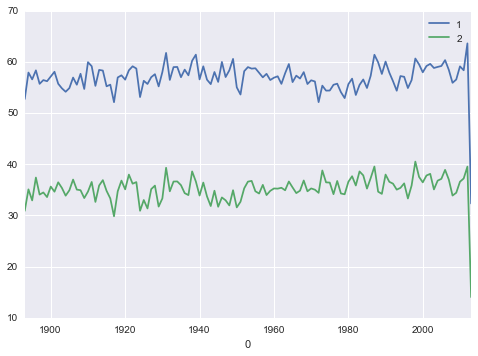

In [48]:
avgs = pd.DataFrame(avgHighsLows).set_index(0)
avgs.plot()

In [49]:
avgs.head()

,1,2
0,,
1893,52.772455,30.910180
1894,57.946108,35.107784
1895,56.613699,32.950685
1896,58.376855,37.418398
1897,55.739726,34.087671


In [50]:
avgs.tail()

,1,2
0,,
2009,56.586301,34.446575
2010,59.158904,36.602740
2011,58.391781,37.238356
2012,63.649315,39.558904
2013,32.355556,14.044444


In [4]:
# Which years had white christmases? Which did not?

# I will define a white Christmas as one that gets snow on Christmas day

xmas = df.copy(deep = True)
xmas = xmas[(xmas.date.dt.month == 12) & (xmas.date.dt.day == 25)]
xmas = xmas[xmas.snow > 0].sort('date')
xmas

,date,maxTemp,minTemp,precip,snow
39688,1893-12-25,33,22,3,1
39997,1903-12-25,17,-9,14,2
40183,1909-12-25,22,9,13,2
40214,1910-12-25,29,8,35,3
40524,1920-12-25,14,-11,17,2
40891,1933-12-25,6,-13,40,4
40922,1934-12-25,6,-13,40,4
40953,1935-12-25,14,-11,10,2
41015,1937-12-25,25,-1,4,1
41263,1945-12-25,28,22,33,3


In [16]:
# wx = df.copy(deep = True)
# wx.sort('date')
# wx['totalSnow'] = 0

# inches = 0
# for index, row in wx.iterrows():
#     inches += row['snow']
#     if row['maxTemp'] > 32 and inches >= 0:
#         inches -= (row['maxTemp'] - 32) * .25
#     if inches < 0:
#         inches = 0
#     wx.set_value(index, 'totalSnow', inches)
    
    

In [74]:
# Average high and low for the day and find change from previous day. 
# Check to see if that correlates with precipitation.
corr = df.copy(deep = True)

prevRow = None
first = True
difMax = []
difMin = []

for index, row in corr.iterrows():
    currentRow = row
    if not first:
        difMax.append(abs(currentRow['maxTemp'] - prevRow['maxTemp']))
        difMin.append(abs(currentRow['minTemp'] - prevRow['minTemp']))
        prevRow = currentRow
    else:
        difMax.append(0)
        difMin.append(0)
        prevRow = currentRow
        first = False
        
corr['difMax'] = difMax
corr['difMin'] = difMin


#########
#COMPLETE THIS EXERCISE, Not sure how to start this one
#########

In [110]:
delta = corr[['precip','difMax', 'difMin']]
delta

,precip,difMax,difMin
7044,0,0,0
7045,0,6,5
7046,0,10,9
7047,0,8,9
7048,0,11,1
7049,0,6,1
7050,70,23,24
7051,0,6,8
7052,0,3,3
7053,40,7,9


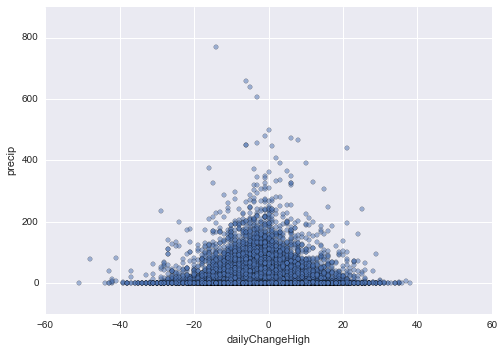

In [19]:
changesH = df.copy(deep = True)
changesH['dailyChangeHigh'] = changesH['maxTemp'] - changesH['maxTemp'].shift()
changesH.plot(kind='scatter', x='dailyChangeHigh', y='precip', alpha=0.5)

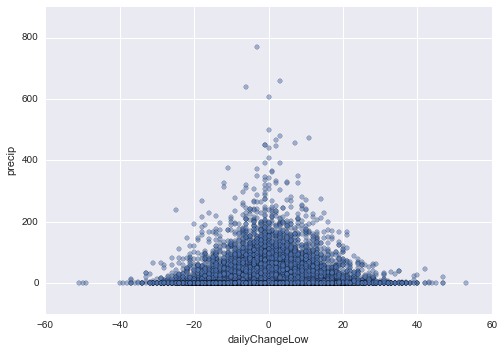

In [20]:
changesL = df.copy(deep = True)
changesL['dailyChangeLow'] = changesL['minTemp'] - changesL['minTemp'].shift()
changesL.plot(kind='scatter', x='dailyChangeLow', y='precip', alpha=0.5)

In [22]:
shifted = df.copy(deep = True)
shifted.sort('date')
shifted.head()

,date,maxTemp,minTemp,precip,snow
7044,1893-03-01,26,4,0,0
7045,1893-03-02,20,9,0,0
7046,1893-03-03,10,0,0,0
7047,1893-03-04,18,-9,0,0
7048,1893-03-05,29,-10,0,0


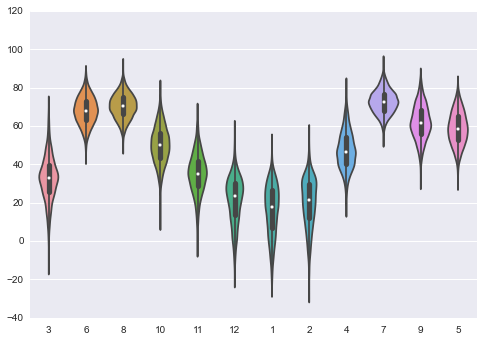

In [25]:
sbn.violinplot(x=df.date.dt.month, y=(df.maxTemp + df.minTemp) / 2)